In [4]:
import pandas as pd
df = pd.read_csv('lyrics.csv')

In [5]:
df = df.replace({'\n': ' '}, regex=True) 

df['word_count'] = df['text'].str.split().str.len()
df = df[df['word_count'] >= 10]
df = df[df['word_count'] <= 1500]

df = df[df['year'] >= 1970]
df = df[df['year'] < 2017]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 261330 entries, 0 to 362236
Data columns (total 7 columns):
index         261330 non-null int64
song          261329 non-null object
year          261330 non-null int64
artist        261330 non-null object
genre         261330 non-null object
text          261330 non-null object
word_count    261330 non-null float64
dtypes: float64(1), int64(2), object(4)
memory usage: 16.0+ MB


In [6]:
df.head()

,index,song,year,artist,genre,text,word_count
0,0,ego-remix,2009,beyonce-knowles,Pop,"Oh baby, how you doing? You know I'm gonna cut...",433.0
1,1,then-tell-me,2009,beyonce-knowles,Pop,"playin' everything so easy, it's like you seem...",258.0
2,2,honesty,2009,beyonce-knowles,Pop,If you search For tenderness It isn't hard to ...,170.0
3,3,you-are-my-rock,2009,beyonce-knowles,Pop,"Oh oh oh I, oh oh oh I [Verse 1:] If I wrote a...",522.0
4,4,black-culture,2009,beyonce-knowles,Pop,"Party the people, the people the party it's po...",312.0


In [7]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
sid = SIA()
df['compound_score'] = df['text'].apply(lambda x: sid.polarity_scores(x).get('compound'))
#erstellt eine neue Spalte mit den compound score
#score >= 0.5 positiv score <= -0.5 negativ und sonst neutraler Song

C:\Users\Steven\Anaconda3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [8]:
df.head()

,index,song,year,artist,genre,text,word_count,compound_score
0,0,ego-remix,2009,beyonce-knowles,Pop,"Oh baby, how you doing? You know I'm gonna cut...",433.0,0.9979
1,1,then-tell-me,2009,beyonce-knowles,Pop,"playin' everything so easy, it's like you seem...",258.0,0.9658
2,2,honesty,2009,beyonce-knowles,Pop,If you search For tenderness It isn't hard to ...,170.0,0.9698
3,3,you-are-my-rock,2009,beyonce-knowles,Pop,"Oh oh oh I, oh oh oh I [Verse 1:] If I wrote a...",522.0,0.9991
4,4,black-culture,2009,beyonce-knowles,Pop,"Party the people, the people the party it's po...",312.0,0.8659


In [9]:
def compound_score_counter(df,liste,category):
    '''
    Methode um ein Datenframe zu erstellen mit den Spalten Jahr,Anzahl negativer Songs,positiver Songs,neutraler Songs
    in der Spaltenreihenfolge 0,1,2,3 == Jahr,Anzahl negativ, Anzahl positiv, Anzahl neutral
    '''
    dataframe = pd.DataFrame()
    for items in liste:
        liste = list([items,df[(df[category] == items )& (df['compound_score']<=-0.5)].apply(len)[0], df[(df[category] == items ) & (df['compound_score']>=0.5)].apply(len)[0],df[(df[category] == items )& ((df['compound_score']<0.5)|(df['compound_score']>-0.5))].apply(len)[0]]) 
        dataframe = dataframe.append(pd.DataFrame([liste]))
    return dataframe

In [10]:
yearList = list(set(df['year']))
genreList = list(set(df['genre']))
#erstellt eine Liste mit den Jahren und Genren

counted_score_per_year = compound_score_counter(df,yearList,'year')
counted_score_per_genre = compound_score_counter(df,genreList,'genre')
#nutzt die oben definierte Funktion um einen Datenframe zu erstellen mit den Anzahl des auftauchens
counted_score_per_genre.head()

,0,1,2,3
0,Electronic,2141,4014,7518
0,Indie,951,1653,3102
0,Hip-Hop,13001,9953,24680
0,Rock,36586,54047,107261
0,Country,2769,9740,14299


In [11]:
counted_score_per_year.head()

,0,1,2,3
0,1970,35,106,165
0,1971,51,112,195
0,1972,39,127,190
0,1973,44,176,244
0,1974,42,80,159


In [12]:
counted_score_without_year = pd.DataFrame()
counted_score_without_year[['negativ','positiv','neutral']] = counted_score_per_year[counted_score_per_year.columns[1:4]]

average1 = counted_score_without_year.divide(counted_score_without_year.sum(axis=1), axis=0)
average1['year'] = counted_score_per_year[counted_score_per_year.columns[:1]]
average1.head()

#hier wird ein Datenframe average erstellt mit dem Prozentuallen Anteil in jeder Zeile
#im unseren Fall wird jedes Jahr der Prozentualler Anteil berechnet

,negativ,positiv,neutral,year
0,0.114379,0.346405,0.539216,1970
0,0.142458,0.312849,0.544693,1971
0,0.109551,0.356742,0.533708,1972
0,0.094828,0.379310,0.525862,1973
0,0.149466,0.284698,0.565836,1974


In [13]:
counted_score_without_genre = pd.DataFrame()
counted_score_without_genre[['negativ','positiv','neutral']] = counted_score_per_genre[counted_score_per_year.columns[1:4]]

average2 = counted_score_without_genre.divide(counted_score_without_genre.sum(axis=1), axis=0)
average2['genre'] = counted_score_per_genre[counted_score_per_genre.columns[:1]]
average2.head()
#hier wird ein Datenframe average erstellt mit dem Prozentuallen Anteil in jeder Zeile
#im unseren Fall wird in jeder Genre der Prozentualler Anteil berechnet

,negativ,positiv,neutral,genre
0,0.156586,0.293571,0.549843,Electronic
0,0.166667,0.289695,0.543638,Indie
0,0.272935,0.208947,0.518117,Hip-Hop
0,0.184877,0.273111,0.542012,Rock
0,0.103290,0.363324,0.533386,Country


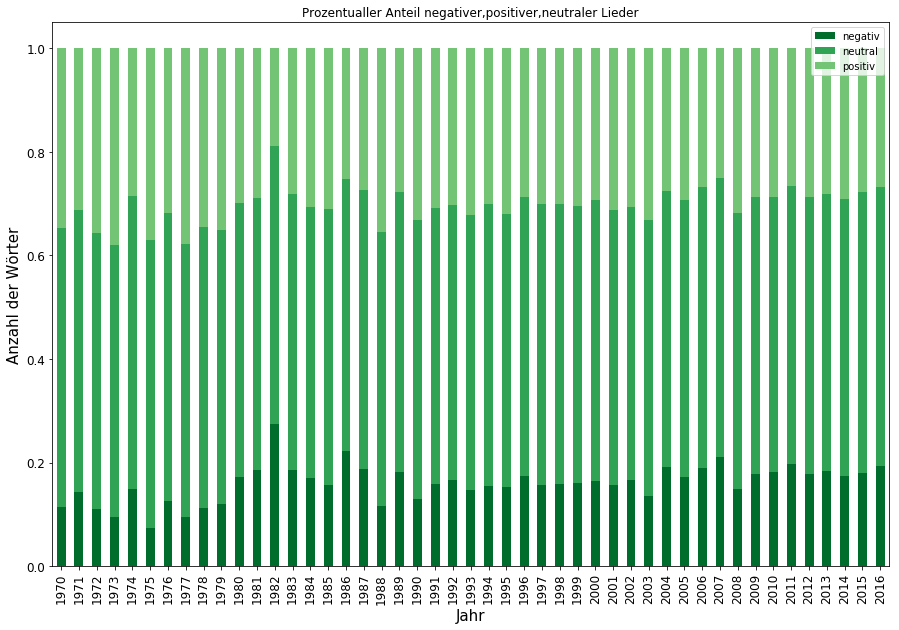

In [14]:
import numpy as np
import matplotlib.pyplot as plt

colors = ["#006D2C", "#31A354","#74C476"]
ax = average1.plot.bar(x = 'year', y = ['negativ','neutral','positiv'], stacked=True, color=colors, figsize=(15,10),fontsize=12,title='Prozentualler Anteil negativer,positiver,neutraler Lieder')
ax.set_xlabel("Jahr", fontsize=15)
ax.set_ylabel("Anzahl der Wörter", fontsize=15)
plt.show()

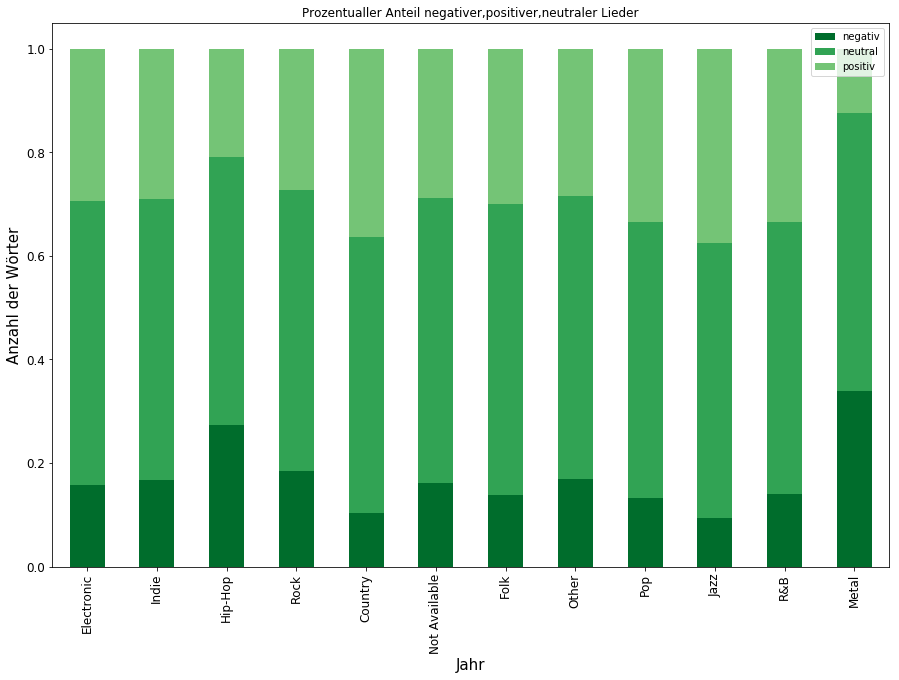

In [15]:
colors = ["#006D2C", "#31A354","#74C476"]
ax = average2.plot.bar(x = 'genre', y = ['negativ','neutral','positiv'], stacked=True, color=colors, figsize=(15,10),fontsize=12,title='Prozentualler Anteil negativer,positiver,neutraler Lieder')
ax.set_xlabel("Jahr", fontsize=15)
ax.set_ylabel("Anzahl der Wörter", fontsize=15)
plt.show()

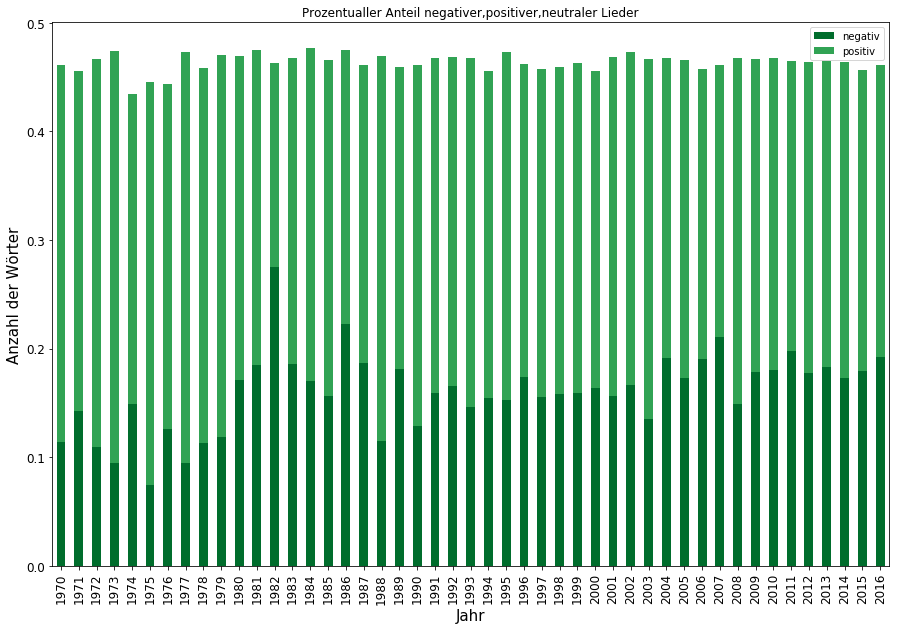

In [16]:
colors = ["#006D2C", "#31A354","#74C476"]
ax = average1.plot.bar(x = 'year', y = ['negativ','positiv'], stacked=True, color=colors, figsize=(15,10),fontsize=12,title='Prozentualler Anteil negativer,positiver,neutraler Lieder')
ax.set_xlabel("Jahr", fontsize=15)
ax.set_ylabel("Anzahl der Wörter", fontsize=15)
plt.show()

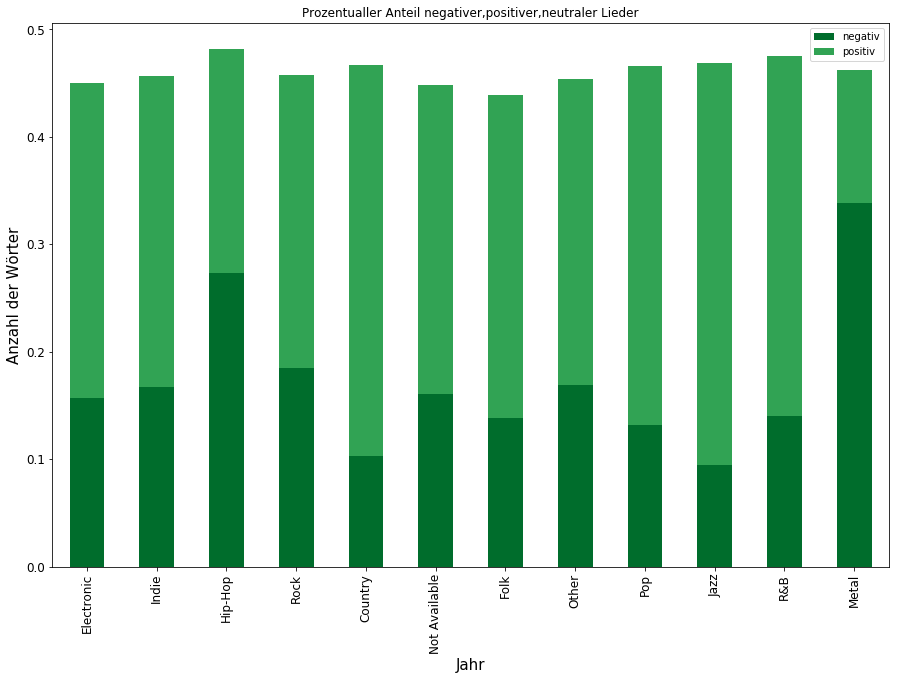

In [17]:
colors = ["#006D2C", "#31A354","#74C476"]
ax = average2.plot.bar(x = 'genre', y = ['negativ','positiv'], stacked=True, color=colors, figsize=(15,10),fontsize=12,title='Prozentualler Anteil negativer,positiver,neutraler Lieder')
ax.set_xlabel("Jahr", fontsize=15)
ax.set_ylabel("Anzahl der Wörter", fontsize=15)
plt.show()